In [67]:
import numpy as np 
import pandas as pd 
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import KBinsDiscretizer


In [46]:
df = pd.read_excel('data\Tabla_airbnb.xlsx')

df.info()



<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\vitta\AppData\Local\Temp\ipykernel_39360\707797362.py:1: SyntaxWarning: invalid escape sequence '\T'
  df = pd.read_excel('data\Tabla_airbnb.xlsx')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220031 entries, 0 to 220030
Data columns (total 27 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   id                                220031 non-null  int64  
 1   nombre_apartamento                219947 non-null  object 
 2   id_anfitrion                      220031 non-null  int64  
 3   nombre_anfitrion                  219324 non-null  object 
 4   zona                              220031 non-null  object 
 5   barrio                            220031 non-null  object 
 6   latitud                           220031 non-null  float64
 7   longitud                          220031 non-null  float64
 8   tipo_alojamiento                  220031 non-null  object 
 9   precio_local                      220031 non-null  int64  
 10  duracion_minima                   220031 non-null  int64  
 11  numero_de_opiniones               220031 non-null  i

In [47]:
df.head()

,id,nombre_apartamento,id_anfitrion,nombre_anfitrion,zona,barrio,latitud,longitud,tipo_alojamiento,precio_local,...,fecha_publicacion_estimada,precio_usd,precio_eur,sector_lujo,reservas_mensual_estimado,noches_ocupadas_mensual_estimado,ingreso_mensual_estimado,noches_ocupadas_anual_estimado,ingreso_anual_estimado,tasa_ocupacion
0,279769,Clean double room,1458748,Anthony,Central,Tower Hamlets,51.50996,0.00012,Private room,70,...,"miércoles, 6 de noviembre de 2019",90.58,81.19,False,0.0,0.0,0.0,0.0,0.0,0.0
1,582625,The heart of Canary Wharf,1314904,Lewis,Central,Tower Hamlets,51.49995,-0.01394,Private room,59,...,"miércoles, 6 de noviembre de 2019",76.35,68.43,False,0.0,0.0,0.0,0.0,0.0,0.0
2,1939814,Deliziosa camera doppia,10034056,Maurizio,Central,Tower Hamlets,51.49091,-0.01732,Private room,69,...,"miércoles, 6 de noviembre de 2019",89.29,80.03,False,0.0,0.0,0.0,0.0,0.0,0.0
3,2096176,Room in Great Location in London.,10693219,Michael,Central,Tower Hamlets,51.52959,-0.04524,Private room,50,...,"miércoles, 6 de noviembre de 2019",64.70,57.99,False,0.0,0.0,0.0,0.0,0.0,0.0
4,3217563,CosyRoom in the heart of Shoreditch,16293995,Marianne,Central,Tower Hamlets,51.51625,-0.07537,Private room,55,...,"miércoles, 6 de noviembre de 2019",71.17,63.79,False,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
df.isnull().sum()

id                                    0
nombre_apartamento                   84
id_anfitrion                          0
nombre_anfitrion                    707
zona                                  0
barrio                                0
latitud                               0
longitud                              0
tipo_alojamiento                      0
precio_local                          0
duracion_minima                       0
numero_de_opiniones                   0
fecha_ultima_opinion                  0
opiniones_por_mes                     0
propiedades_por_host                  0
disponibilidad_anual                  0
2                                     0
fecha_publicacion_estimada            0
precio_usd                            0
precio_eur                            0
sector_lujo                           0
reservas_mensual_estimado             0
noches_ocupadas_mensual_estimado      0
ingreso_mensual_estimado              0
noches_ocupadas_anual_estimado        0


In [49]:
#Valores Extraños
unique_df = df.nunique().reset_index()
unique_df.columns = ['features', 'n_values']
unique_df

,features,n_values
0,id,220031
1,nombre_apartamento,211068
2,id_anfitrion,144510
3,nombre_anfitrion,31402
4,zona,57
5,barrio,562
6,latitud,98672
7,longitud,108328
8,tipo_alojamiento,4
9,precio_local,1566


In [50]:
#revisamos duplicados
print(df.duplicated().sum())

0


In [51]:
df = df.drop(['nombre_apartamento', 'id_anfitrion', 'nombre_anfitrion', 'latitud', 'longitud', 'propiedades_por_host', 'fecha_publicacion_estimada','ingreso_mensual_estimado', 'noches_ocupadas_mensual_estimado', 'fecha_ultima_opinion'], axis=1)
df.head()


,id,zona,barrio,tipo_alojamiento,precio_local,duracion_minima,numero_de_opiniones,opiniones_por_mes,disponibilidad_anual,2,precio_usd,precio_eur,sector_lujo,reservas_mensual_estimado,noches_ocupadas_anual_estimado,ingreso_anual_estimado,tasa_ocupacion
0,279769,Central,Tower Hamlets,Private room,70,1,0,0.0,0,London,90.58,81.19,False,0.0,0.0,0.0,0.0
1,582625,Central,Tower Hamlets,Private room,59,1,0,0.0,0,London,76.35,68.43,False,0.0,0.0,0.0,0.0
2,1939814,Central,Tower Hamlets,Private room,69,1,0,0.0,0,London,89.29,80.03,False,0.0,0.0,0.0,0.0
3,2096176,Central,Tower Hamlets,Private room,50,1,0,0.0,0,London,64.70,57.99,False,0.0,0.0,0.0,0.0
4,3217563,Central,Tower Hamlets,Private room,55,1,0,0.0,0,London,71.17,63.79,False,0.0,0.0,0.0,0.0


In [57]:
df.drop('precio_usd', axis=1, inplace=True)

In [58]:
print(df.columns)




Index(['id', 'zona', 'barrio', 'tipo_alojamiento', 'precio_local',
       'duracion_minima', 'numero_de_opiniones', 'opiniones_por_mes',
       'disponibilidad_anual', 'city', 'precio_eur', 'sector_lujo',
       'reservas_mensual_estimado', 'noches_ocupadas_anual_estimado',
       'ingreso_anual_estimado', 'tasa_ocupacion'],
      dtype='object')


In [59]:
df.rename(columns={2:'city'}, inplace=True)


In [60]:
print(df.columns)


Index(['id', 'zona', 'barrio', 'tipo_alojamiento', 'precio_local',
       'duracion_minima', 'numero_de_opiniones', 'opiniones_por_mes',
       'disponibilidad_anual', 'city', 'precio_eur', 'sector_lujo',
       'reservas_mensual_estimado', 'noches_ocupadas_anual_estimado',
       'ingreso_anual_estimado', 'tasa_ocupacion'],
      dtype='object')


In [61]:
print(df.dtypes)

id                                  int64
zona                               object
barrio                             object
tipo_alojamiento                   object
precio_local                        int64
duracion_minima                     int64
numero_de_opiniones                 int64
opiniones_por_mes                 float64
disponibilidad_anual                int64
city                               object
precio_eur                        float64
sector_lujo                         int64
reservas_mensual_estimado         float64
noches_ocupadas_anual_estimado    float64
ingreso_anual_estimado            float64
tasa_ocupacion                    float64
dtype: object


In [62]:
#trasformar el booleano a int
df['sector_lujo'] = df['sector_lujo'].astype(int)


Creación y entreno del modelo


In [69]:
# Convertir variables categóricas usando get_dummies
df = pd.get_dummies(df, columns=['zona', 'barrio', 'tipo_alojamiento', 'city'])

# 3. Verificar la conversión
print("\nTipos de datos después:")
print(df.dtypes)


Tipos de datos después:
id                       int64
precio_local             int64
duracion_minima          int64
numero_de_opiniones      int64
opiniones_por_mes      float64
                        ...   
city_Madrid               bool
city_Milan                bool
city_Ny                   bool
city_Sydney               bool
city_Tokyo                bool
Length: 641, dtype: object


In [70]:
#division de los datos en X y Y 
x = df.drop('ingreso_anual_estimado', axis=1)
y = df['ingreso_anual_estimado']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape


((176024, 640), (44007, 640))

In [71]:
#crear y entrenar el modelo
model_xgb = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

model_xgb.fit(x_train, y_train)

#predicciones
y_pred = model_xgb.predict(x_test)

#evaluar el modelo calcuulando métriucas de regresion
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = model_xgb.score(x_test, y_test)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')



MSE: 32354456.35723313
RMSE: 5688.097780210282
R2: 0.9700256030475638


In [72]:
#calculo del accuracy
y_test_class = (y_test > y_test.mean()).astype(int)
y_pred_class = (y_pred > y_pred.mean()).astype(int)

accuracy = accuracy_score(y_test_class, y_pred_class)
print(f'Accuracy: {accuracy}')


Accuracy: 0.9927738768832232


Métricas de evaluación:
RMSE: 5688.10
R2 Score: 0.97

Primeras 10 predicciones:
        Valor Real    Predicción   Diferencia
100310  22375.3416  23593.710938 -1218.369338
113946      0.0000      1.394108    -1.394108
142915   1160.2884   1328.604858  -168.316458
9945        0.0000     87.462051   -87.462051
107353      0.0000   -400.259338   400.259338
135211   5943.8088   6140.166504  -196.357704
121542      0.0000    376.355865  -376.355865
133031   6712.9656   6620.642578    92.323022
138544   4160.1708   3563.534424   596.636376
115853      0.0000    128.108124  -128.108124

Estadísticas de las diferencias:
count     44007.000000
mean        -57.563366
std        5687.871128
min     -389013.587500
25%        -187.772597
50%         -25.158478
75%         142.405277
max      571731.706000
Name: Diferencia, dtype: float64

Error porcentual promedio: inf%


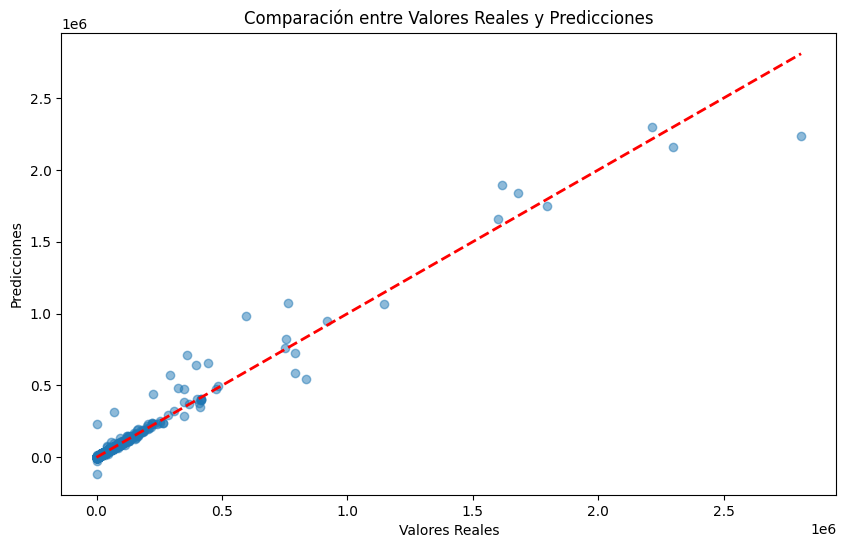

In [73]:
# 1. Hacer predicciones con X_test
y_pred = model_xgb.predict(x_test)

# 2. Crear DataFrame con resultados
resultados = pd.DataFrame({
    'Valor Real': y_test,
    'Predicción': y_pred,
    'Diferencia': y_test - y_pred
})

# 3. Mostrar métricas y algunos resultados
print("Métricas de evaluación:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"R2 Score: {model_xgb.score(x_test, y_test):.2f}")

# 4. Mostrar primeros 10 resultados
print("\nPrimeras 10 predicciones:")
print(resultados.head(10))

# 5. Estadísticas básicas de las diferencias
print("\nEstadísticas de las diferencias:")
print(resultados['Diferencia'].describe())

# 6. Calcular el error porcentual
resultados['Error_Porcentual'] = abs(resultados['Diferencia'] / resultados['Valor Real'] * 100)
print("\nError porcentual promedio: {:.2f}%".format(resultados['Error_Porcentual'].mean()))

# 7. Visualizar resultados (opcional, si tienes matplotlib)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación entre Valores Reales y Predicciones')
plt.show()


Importancia de características:
                       caracteristica  importancia
5                disponibilidad_anual     0.191119
635                       city_Madrid     0.186536
6                          precio_eur     0.165760
1                        precio_local     0.088468
535                barrio_Shinjuku Ku     0.066010
9      noches_ocupadas_anual_estimado     0.063261
533                 barrio_Shibuya Ku     0.047242
42                     zona_Salamanca     0.032574
630  tipo_alojamiento_Entire home/apt     0.027679
631       tipo_alojamiento_Hotel room     0.019313


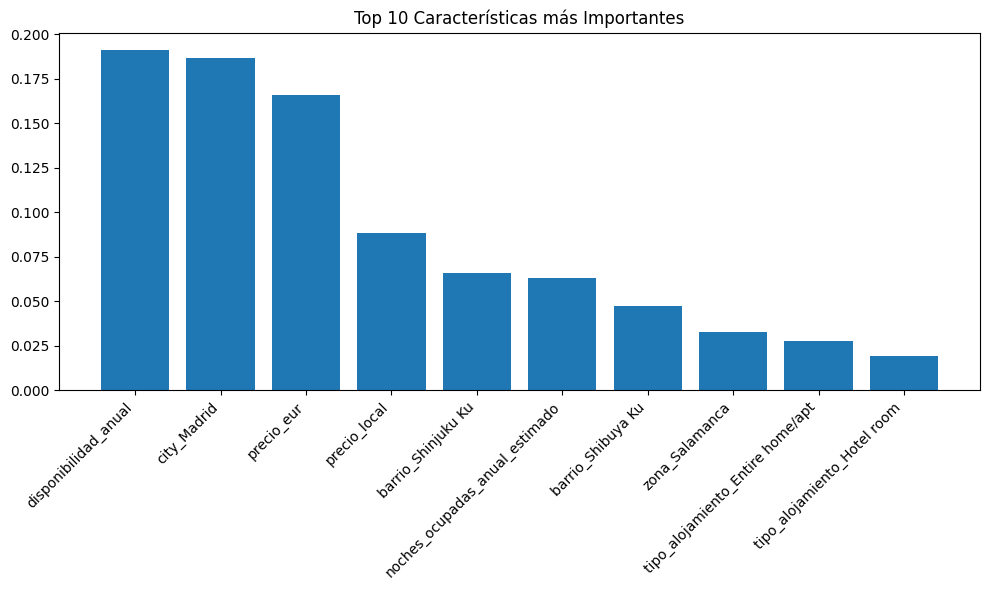

In [75]:
# 8. Importancia de características
importancia = pd.DataFrame({
    'caracteristica': x.columns,
    'importancia': model_xgb.feature_importances_
})
importancia = importancia.sort_values('importancia', ascending=False)

print("\nImportancia de características:")
print(importancia.head(10))

# Visualizar importancia de características
plt.figure(figsize=(10, 6))
plt.bar(importancia['caracteristica'][:10], importancia['importancia'][:10])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Características más Importantes')
plt.tight_layout()
plt.show()

In [76]:
import joblib

# Guardar el modelo
joblib.dump(model_xgb, 'model_ingresos.pkl')

['model_ingresos.pkl']

In [77]:
print(df.dtypes)

id                       int64
precio_local             int64
duracion_minima          int64
numero_de_opiniones      int64
opiniones_por_mes      float64
                        ...   
city_Madrid               bool
city_Milan                bool
city_Ny                   bool
city_Sydney               bool
city_Tokyo                bool
Length: 641, dtype: object
